In [ ]:
if __name__ == '__main__':
    from fastai.vision.all import *
    from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
    import matplotlib.pyplot as plt

    # ===== PARÁMETROS =====
    DATASET_PATH = Path('dataset_rangos_10_split')
    IMG_SIZE = (224, 224)
    BATCH_SIZE = 32
    EPOCHS = 20
    LR = 1e-3

    # ===== CUDA CHECK =====
    print("CUDA Available: ", torch.cuda.is_available())
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Device: ", device)

    # ===== DIVISIÓN DE DATOS =====
    # Usamos GrandparentSplitter para dividir el dataset en train, validación y test
    splitter = GrandparentSplitter(train_name='train', valid_name='valid')

    # ===== CARGAR DATOS =====
    dblock = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=splitter,  # División explícita en train/valid
        get_y=parent_label,
        item_tfms=Resize(IMG_SIZE),
        batch_tfms=aug_transforms(
            do_flip=True,
            max_rotate=10.0,
            max_zoom=1.2,
            max_warp=0.2,
            min_scale=0.8
        )
    )

    # ===== DATALOADERS =====
    # Cargar los datos de train y validación
    dls = dblock.dataloaders(DATASET_PATH, bs=BATCH_SIZE, num_workers=0)

    # Mostrar algunas imágenes
    dls.show_batch(max_n=9, figsize=(8, 8))

    # ===== TEST SET =====
    # Cargar imágenes de prueba desde el conjunto 'test'
    test_files = get_image_files(DATASET_PATH / 'test')
    test_dl = dls.test_dl(test_files)

    # ===== CREAR EL MODELO =====
    learn = vision_learner(
        dls,
        arch=models.efficientnet_b4,
        metrics=[accuracy],
        loss_func=CrossEntropyLossFlat()
    ).to_fp16()

    # ===== ENTRENAMIENTO =====
    lr_recommended = learn.lr_find().valley
    print(f"Recommended Learning Rate: {lr_recommended}")

    # Entrenar con el learning rate encontrado
    learn.fit_one_cycle(EPOCHS, lr_recommended)

    # ===== EVALUACIÓN EN TEST =====
    # Evaluar el modelo en el conjunto de test
    print("\n🔍 Evaluación en el conjunto de prueba (test):")
    test_loss, test_accuracy = learn.validate(dl=test_dl, metrics=[accuracy])
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Obtener predicciones en el test set
    preds, targs = learn.get_preds(dl=test_dl)
    pred_labels = preds.argmax(dim=1)

    # ===== MÉTRICAS PERSONALIZADAS =====
    # 1. MAE (Mean Absolute Error)
    mae = mean_absolute_error(targs, pred_labels)
    print(f"Mean Absolute Error (MAE) en test: {mae:.4f}")

    # 2. Matriz de confusión
    cm = confusion_matrix(targs, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title('Confusion Matrix - Test')
    plt.show()

    # 3. Clasificación detallada
    print("\nClasificación detallada (test):")
    print(classification_report(targs, pred_labels, target_names=dls.vocab))

    # ===== GUARDAR MODELO =====
    learn.save('efficientnet_b4_full_dataset')

    # ===== GRAFICAR MÉTRICAS =====
    plt.figure(figsize=(12, 4))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(L(learn.recorder.values).itemgot(2), label='Train Accuracy')
    plt.plot(L(learn.recorder.values).itemgot(3), label='Validation Accuracy')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(L(learn.recorder.values).itemgot(0), label='Train Loss')
    plt.plot(L(learn.recorder.values).itemgot(1), label='Validation Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


CUDA Available:  True
Device:  cuda


Recommended Learning Rate: 0.00363078061491251


epoch,train_loss,valid_loss,accuracy,time
0,2.102488,1.635287,0.393685,08:30
1,1.543375,1.385115,0.441111,05:24
2,1.357838,1.261414,0.468099,05:29
3,1.287204,1.156360,0.494694,05:26
4,1.157261,1.053304,0.542644,05:24
5,1.125834,1.010262,0.563998,05:29
6,1.062190,0.972285,0.575527,05:32


CUDA Available:  True
Device:  cuda


Recommended Learning Rate: 0.007585775572806597


epoch,train_loss,valid_loss,accuracy,time
0,1.952654,1.523527,0.416088,05:37
1,1.485106,1.346089,0.439408,05:40
2,1.374483,1.266761,0.467444,05:39
3,1.311645,1.195977,0.489192,05:44
4,1.284524,1.142142,0.504651,05:39
5,1.207750,1.074867,0.534652,05:42
6,1.187434,1.050871,0.543561,05:35
7,1.093245,0.985279,0.573562,05:35
8,1.091904,0.981448,0.571466,05:36
9,1.049232,0.948680,0.586401,05:38


Better model found at epoch 0 with accuracy value: 0.4160880446434021.
Better model found at epoch 1 with accuracy value: 0.4394078254699707.
Better model found at epoch 2 with accuracy value: 0.4674440026283264.
Better model found at epoch 3 with accuracy value: 0.4891916811466217.
Better model found at epoch 4 with accuracy value: 0.5046508312225342.
Better model found at epoch 5 with accuracy value: 0.5346521735191345.
Better model found at epoch 6 with accuracy value: 0.5435608625411987.
Better model found at epoch 7 with accuracy value: 0.5735621452331543.
Better model found at epoch 9 with accuracy value: 0.5864011645317078.
Better model found at epoch 10 with accuracy value: 0.5938687324523926.
Better model found at epoch 12 with accuracy value: 0.6052666306495667.
Better model found at epoch 15 with accuracy value: 0.6103760004043579.
Better model found at epoch 22 with accuracy value: 0.6339578032493591.
Better model found at epoch 25 with accuracy value: 0.6361849904060364.
B

c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\fastai\learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


TypeError: Learner.validate() got an unexpected keyword argument 'metrics'

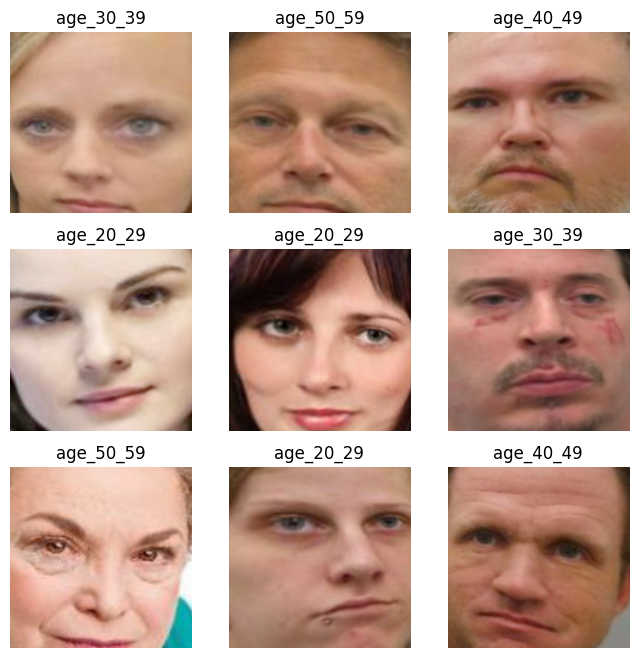

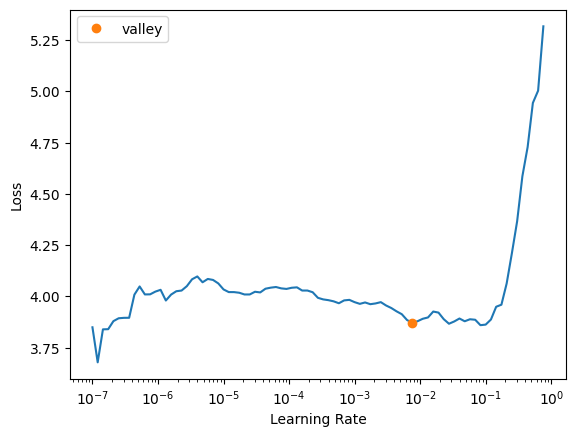

In [ ]:
if __name__ == '__main__':
    from fastai.vision.all import *
    from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
    import matplotlib.pyplot as plt

    # ===== PARÁMETROS =====
    DATASET_PATH = Path('dataset_rangos_10_split')
    IMG_SIZE = (224, 224)
    BATCH_SIZE = 32
    EPOCHS = 60
    LR = 1e-3

    # ===== CUDA CHECK =====
    print("CUDA Available: ", torch.cuda.is_available())
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Device: ", device)

    # ===== DIVISIÓN DE DATOS =====
    # Usamos GrandparentSplitter para dividir el dataset en train, validación y test
    splitter = GrandparentSplitter(train_name='train', valid_name='valid')

    # ===== CARGAR DATOS =====
    dblock = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=splitter,  # División explícita en train/valid
        get_y=parent_label,
        item_tfms=Resize(IMG_SIZE),
        batch_tfms=aug_transforms(
            do_flip=True,
            max_rotate=10.0,
            max_zoom=1.2,
            max_warp=0.2,
            min_scale=0.8
        )
    )

    # ===== DATALOADERS =====
    # Cargar los datos de train y validación
    dls = dblock.dataloaders(DATASET_PATH, bs=BATCH_SIZE, num_workers=0)

    # Mostrar algunas imágenes
    dls.show_batch(max_n=9, figsize=(8, 8))

    # ===== TEST SET =====
    # Cargar imágenes de prueba desde el conjunto 'test'
    test_files = get_image_files(DATASET_PATH / 'test')
    test_dl = dls.test_dl(test_files)

    # ===== CREAR EL MODELO =====
    learn = vision_learner(
        dls,
        arch=models.efficientnet_b4,
        metrics=[accuracy],
        loss_func=CrossEntropyLossFlat()
    ).to_fp16()

    # ===== ENTRENAMIENTO =====
    # Encontrar la mejor tasa de aprendizaje
    lr_recommended = learn.lr_find().valley
    print(f"Recommended Learning Rate: {lr_recommended}")

    # Entrenar el modelo y guardar tanto el último como el mejor
    learn.fit_one_cycle(
        EPOCHS,
        lr_recommended,
        cbs=[
            SaveModelCallback(monitor='accuracy', fname='best_model'),  # Guardar el mejor modelo basado en 'accuracy'
            CSVLogger(fname='training_log.csv')  # Guardar el historial del entrenamiento en un CSV
        ]
    )

    # Guardar el último modelo después de entrenar
    learn.save('last_model', with_opt=True)





    # ===== EVALUACIÓN EN TEST =====
    # Cargar el mejor modelo antes de evaluar en el test set
    learn.load('best_model')

    # ===== EVALUACIÓN EN TEST =====
    # Evaluar el modelo en el conjunto de test
    print("\n🔍 Evaluación en el conjunto de prueba (test):")
    test_loss, test_accuracy = learn.validate(dl=test_dl)  # Elimina el argumento `metrics`
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


    # Obtener predicciones en el test set
    preds, targs = learn.get_preds(dl=test_dl)
    pred_labels = preds.argmax(dim=1)

    # ===== MÉTRICAS PERSONALIZADAS =====
    # 1. MAE (Mean Absolute Error)
    mae = mean_absolute_error(targs, pred_labels)
    print(f"Mean Absolute Error (MAE) en test: {mae:.4f}")

    # 2. Matriz de confusión
    cm = confusion_matrix(targs, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title('Confusion Matrix - Test')
    plt.show()

    # 3. Clasificación detallada
    print("\nClasificación detallada (test):")
    print(classification_report(targs, pred_labels, target_names=dls.vocab))

    # ===== GRAFICAR MÉTRICAS =====
    plt.figure(figsize=(12, 4))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(L(learn.recorder.values).itemgot(2), label='Train Accuracy')
    plt.plot(L(learn.recorder.values).itemgot(3), label='Validation Accuracy')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(L(learn.recorder.values).itemgot(0), label='Train Loss')
    plt.plot(L(learn.recorder.values).itemgot(1), label='Validation Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B4_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.

Test Accuracy: 0.6587
Mean Absolute Error (MAE): 0.4723


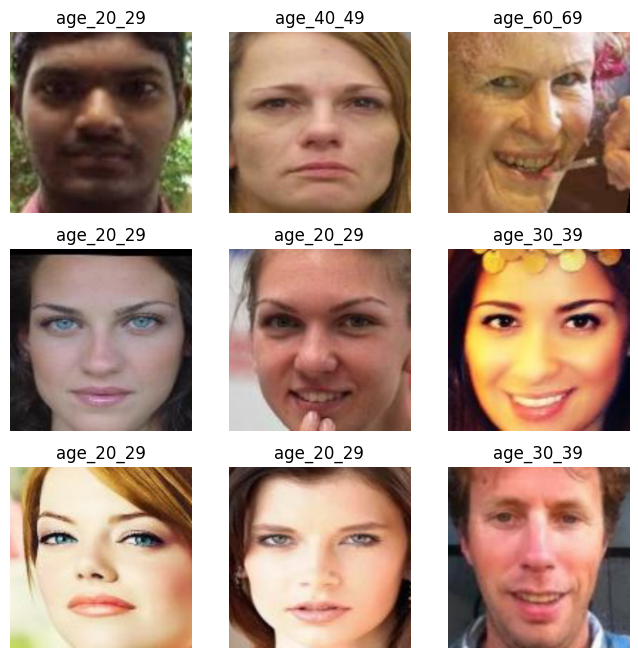

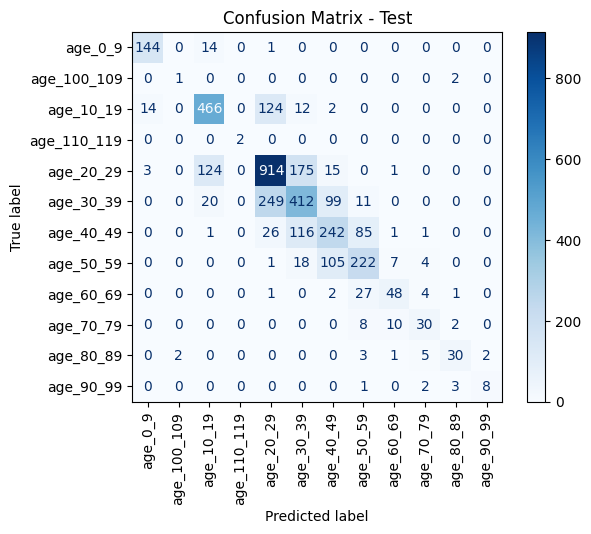


🔍 Evaluación en el conjunto de prueba (test):


c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


Test Loss: 0.8469, Test Accuracy: 0.6587

Clasificación detallada (test):
              precision    recall  f1-score   support

     age_0_9       0.89      0.91      0.90       159
 age_100_109       0.33      0.33      0.33         3
   age_10_19       0.75      0.75      0.75       618
 age_110_119       1.00      1.00      1.00         2
   age_20_29       0.69      0.74      0.72      1232
   age_30_39       0.56      0.52      0.54       791
   age_40_49       0.52      0.51      0.52       472
   age_50_59       0.62      0.62      0.62       357
   age_60_69       0.71      0.58      0.64        83
   age_70_79       0.65      0.60      0.62        50
   age_80_89       0.79      0.70      0.74        43
   age_90_99       0.80      0.57      0.67        14

    accuracy                           0.66      3824
   macro avg       0.69      0.65      0.67      3824
weighted avg       0.66      0.66      0.66      3824



In [27]:
from fastai.vision.all import *
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# ===== PARÁMETROS =====
DATASET_PATH = Path('dataset_rangos_10_split')  # Ruta de tu dataset
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# ===== CONFIGURAR DATALOADERS =====
splitter = GrandparentSplitter(train_name='train', valid_name='valid')

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=splitter,
    get_y=parent_label,
    item_tfms=Resize(IMG_SIZE)
)

dls = dblock.dataloaders(DATASET_PATH, bs=BATCH_SIZE, num_workers=0)

# Mostrar algunas imágenes para verificar la carga
dls.show_batch(max_n=9, figsize=(8, 8))

# ===== CARGAR MODELO GUARDADO =====
learn = vision_learner(
    dls,
    arch=models.efficientnet_b4,
    metrics=[accuracy],
    loss_func=CrossEntropyLossFlat()
).to_fp16()

# Cargar el modelo guardado (ajusta el nombre si es diferente)
learn.load('best_model')

# ===== CREAR DATA LOADER PARA TEST =====
test_files = get_image_files(DATASET_PATH / 'test')
test_dl = dls.test_dl(test_files, with_labels=True)  # Asegúrate de incluir etiquetas

# ===== OBTENER PREDICCIONES =====
preds, targs = learn.get_preds(dl=test_dl)

if targs is not None:  # Si hay etiquetas en el conjunto de test
    pred_labels = preds.argmax(dim=1)

    # Calcular precisión
    acc = (pred_labels == targs).float().mean()
    print(f"Test Accuracy: {acc:.4f}")

    # Calcular MAE
    mae = mean_absolute_error(targs, pred_labels)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(targs, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title('Confusion Matrix - Test')
    plt.show()
else:  # Si no hay etiquetas, solo generar predicciones
    print("El conjunto de test no tiene etiquetas. Solo se generan predicciones.")
    print(preds)

# ===== EVALUACIÓN FINAL =====
print("\n🔍 Evaluación en el conjunto de prueba (test):")
test_loss, test_accuracy = learn.validate(dl=test_dl)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Clasificación detallada
print("\nClasificación detallada (test):")
print(classification_report(targs, pred_labels, target_names=dls.vocab))


1. Análisis del Entrenamiento
El modelo entrenó durante 60 épocas. A continuación, se analiza su comportamiento:

Entrenamiento inicial: En las primeras épocas, la pérdida de entrenamiento (train_loss) y la pérdida de validación (valid_loss) disminuyen significativamente, lo que indica que el modelo está aprendiendo.
Estancamiento: Después de la época 15, la disminución de la pérdida se desacelera considerablemente. Incluso en épocas posteriores, se observa fluctuación en la pérdida de validación y entrenamiento, con valores como 1.123838 y 1.689022, lo que indica que el modelo puede estar sobreajustándose o enfrentando un problema de estabilidad.
Accuracy en validación: La métrica de accuracy llega a un punto máximo de 0.6587 en el conjunto de test, lo que sugiere que el modelo alcanzó un rendimiento consistente hacia las últimas épocas, pero no parece mejorar significativamente más allá de este punto.
2. Análisis de Métricas del Test
Test Accuracy: 0.6587. Aunque no es un valor extremadamente alto, es razonable considerando la complejidad del problema y el desbalanceo de las clases.
Mean Absolute Error (MAE): 0.4723. Este valor indica que, en promedio, las predicciones están aproximadamente a medio rango de la clase correcta (lo que equivale a un error promedio de unos 5 años).
Pérdida en el test (Test Loss): 0.8469. Es razonable, pero podría indicar espacio para mejorar en la optimización.
3. Análisis de la Matriz de Confusión
La matriz de confusión revela información importante:

Clases dominantes:
Las clases más comunes (como age_20_29, age_10_19, y age_30_39) muestran buenos valores de precisión y recall.
Estas clases reciben la mayor parte de las predicciones correctas, ya que tienen más ejemplos en el dataset.
Subrepresentación de clases mayores:
Clases como age_100_109 o age_110_119 tienen muy pocos ejemplos, lo que dificulta la generalización del modelo.
El modelo no predice bien estas clases debido al desbalanceo extremo.
Confusión en clases cercanas:
El modelo confunde significativamente las clases cercanas (por ejemplo, age_30_39 y age_40_49), lo cual es esperado ya que las características visuales en estas edades pueden ser similares.
4. Conclusiones del Modelo
Buen rendimiento en clases bien representadas: El modelo funciona mejor en clases con mayor cantidad de ejemplos, como age_10_19 y age_20_29.
Problemas en clases subrepresentadas: Las clases con pocos datos muestran bajo rendimiento (e.g., age_100_109).
Posible sobreajuste: La fluctuación en la pérdida de validación hacia las últimas épocas sugiere que el modelo podría estar sobreajustándose a los datos de entrenamiento.

NO es bueno añadir capas a la red por el desbalanceo severo entre clases (creo)

# VERSION 2

CUDA Available:  True
Device:  cuda


Recommended Learning Rate: 0.0012022644514217973


epoch,train_loss,valid_loss,accuracy,time
0,3.212770,2.550490,0.204507,04:47
1,2.942396,2.389805,0.243024,04:44
2,2.668697,2.121320,0.295821,04:39
3,2.359166,1.886429,0.332635,04:43
4,2.157980,1.716366,0.355692,04:42
5,1.934770,1.555743,0.389624,04:47
6,1.837998,1.504036,0.388183,04:40
7,1.724494,1.458877,0.408096,04:45
8,1.557846,1.420640,0.421459,04:42
9,1.623569,1.392075,0.426569,04:44


Better model found at epoch 0 with accuracy value: 0.2045067399740219.
Better model found at epoch 1 with accuracy value: 0.24302370846271515.
Better model found at epoch 2 with accuracy value: 0.29582077264785767.
Better model found at epoch 3 with accuracy value: 0.3326345980167389.
Better model found at epoch 4 with accuracy value: 0.35569238662719727.
Better model found at epoch 5 with accuracy value: 0.3896239995956421.
Better model found at epoch 7 with accuracy value: 0.40809643268585205.
Better model found at epoch 8 with accuracy value: 0.42145946621894836.
Better model found at epoch 9 with accuracy value: 0.4265688359737396.
Better model found at epoch 10 with accuracy value: 0.4273549020290375.
Better model found at epoch 11 with accuracy value: 0.43757370114326477.
Better model found at epoch 12 with accuracy value: 0.4608934819698334.
Better model found at epoch 13 with accuracy value: 0.4696711599826813.
Better model found at epoch 14 with accuracy value: 0.4829031825065

c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\fastai\learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


TypeError: unsupported format string passed to NoneType.__format__

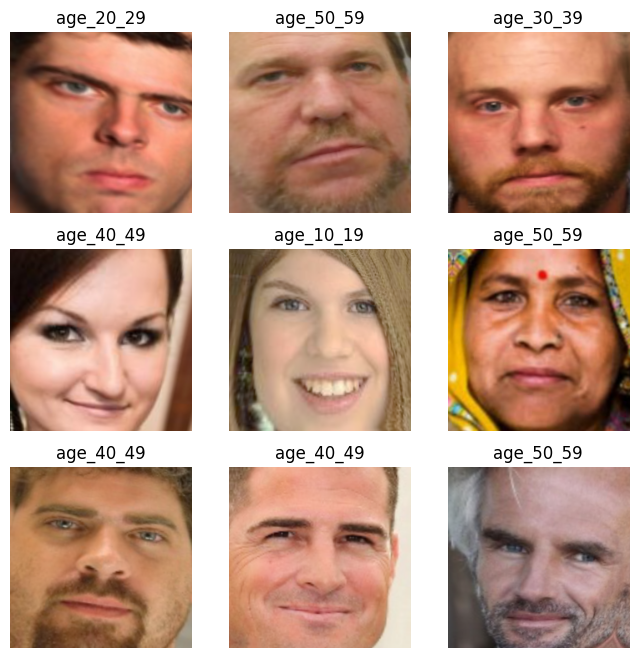

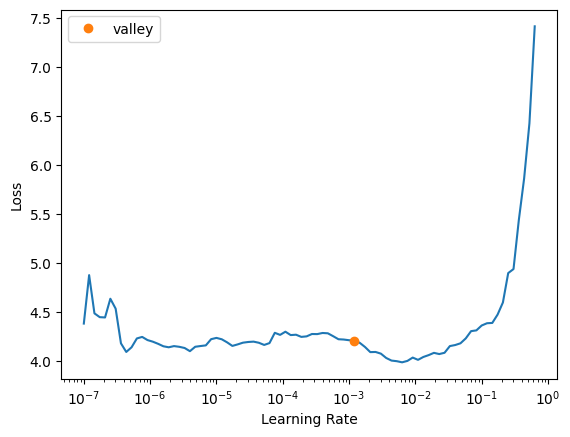

In [3]:
if __name__ == '__main__':
    from fastai.vision.all import *
    from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, balanced_accuracy_score, cohen_kappa_score
    import matplotlib.pyplot as plt
    from fastai.optimizer import Adam
    from functools import partial
    import torch
    import numpy as np
    import random

    # ===== ESTABLECER SEMILLA PARA REPRODUCIBILIDAD =====
    SEED = 42
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

    torch.cuda.empty_cache()

    # ===== PARÁMETROS =====
    DATASET_PATH = Path('dataset_rangos_10_split')
    IMG_SIZE = (224, 224)
    BATCH_SIZE = 32
    EPOCHS = 80
    LR = 1e-3

    my_adamw = partial(Adam, 
                       lr=1e-3,
                       wd=1e-2,           # Weight decay
                       decouple_wd=True   # Decoupled = AdamW
                      )

    # ===== CUDA CHECK =====
    print("CUDA Available: ", torch.cuda.is_available())
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Device: ", device)

    # ===== DIVISIÓN DE DATOS =====
    splitter = GrandparentSplitter(train_name='train', valid_name='valid')

    # ===== CARGAR DATOS =====
    dblock = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=splitter,  # División explícita en train/valid
        get_y=parent_label,
        item_tfms=Resize(IMG_SIZE),
        batch_tfms=aug_transforms(
            do_flip=True,
            max_rotate=10.0,
            max_zoom=1.2,
            max_warp=0.2,
            min_scale=0.8
        )
    )

    # ===== DATALOADERS =====
    # Antes de crear los dataloaders, fija la semilla con una función especial
    set_seed(SEED, reproducible=True)

    # Crear los dataloaders
    dls = dblock.dataloaders(DATASET_PATH, bs=BATCH_SIZE, num_workers=0)

    # Mostrar algunas imágenes
    dls.show_batch(max_n=9, figsize=(8, 8))

    # ===== TEST SET =====
    test_files = get_image_files(DATASET_PATH / 'test')
    test_dl = dls.test_dl(test_files)

    # ===== OBTENER PESOS POR CLASE =====
    class_counts = [max(len(list((DATASET_PATH / 'train' / cls).glob('*.jpg'))), 1) for cls in os.listdir(DATASET_PATH / 'train')]

    # Crear pesos inversamente proporcionales al número de imágenes en cada clase
    class_weights = torch.tensor([1.0 / c for c in class_counts], dtype=torch.float32)  # Mantén esto en CPU
    class_weights = class_weights.to(device)  # Muévelo a GPU después

    # ===== CREAR EL MODELO =====
    learn = vision_learner(
        dls,
        arch=models.efficientnet_b4,
        metrics=[accuracy],
        loss_func=CrossEntropyLossFlat(weight=class_weights.cpu()),
        opt_func=my_adamw
    ).to_fp16()

    # ===== ENTRENAMIENTO =====
    lr_recommended = learn.lr_find().valley
    print(f"Recommended Learning Rate: {lr_recommended}")

    learn.fit_one_cycle(
        EPOCHS,
        lr_recommended,
        cbs=[
            SaveModelCallback(monitor='accuracy', fname='best_model_v2'),
            EarlyStoppingCallback(monitor='accuracy', patience=10),
            CSVLogger(fname='training_log_v2.csv')
        ]
    )

    # Guardar el último modelo después de entrenar
    learn.save('last_model_v2')

    # ===== EVALUACIÓN EN TEST =====
    learn.load('best_model_v2')
    print("\n🔍 Evaluación en el conjunto de prueba (test):")
    test_loss, test_accuracy = learn.validate(dl=test_dl)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


    # Obtener predicciones en el test set
    preds, targs = learn.get_preds(dl=test_dl)
    pred_labels = preds.argmax(dim=1)

    # ===== MÉTRICAS PERSONALIZADAS =====
    if targs is not None:
        # 1. MAE (Mean Absolute Error)
        mae = mean_absolute_error(targs, pred_labels)
        print(f"Mean Absolute Error (MAE) en test: {mae:.4f}")

        # 2. Balanced Accuracy
        balanced_acc = balanced_accuracy_score(targs, pred_labels)
        print(f"Balanced Accuracy: {balanced_acc:.4f}")

        # 3. Cohen's Kappa
        kappa = cohen_kappa_score(targs, pred_labels)
        print(f"Cohen's Kappa: {kappa:.4f}")

        # 4. Matriz de Confusión
        cm = confusion_matrix(targs, pred_labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
        disp.plot(cmap='Blues', xticks_rotation='vertical')
        plt.title('Confusion Matrix - Test')
        plt.show()

        # 5. Clasificación Detallada
        print("\nClasificación detallada (test):")
        print(classification_report(targs, pred_labels, target_names=dls.vocab))
    else:
        print("El conjunto de test no tiene etiquetas. Solo se generan predicciones.")

    # ===== GRAFICAR MÉTRICAS =====
    plt.figure(figsize=(12, 4))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(L(learn.recorder.values).itemgot(2), label='Train Accuracy')
    plt.plot(L(learn.recorder.values).itemgot(3), label='Validation Accuracy')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(L(learn.recorder.values).itemgot(0), label='Train Loss')
    plt.plot(L(learn.recorder.values).itemgot(1), label='Validation Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B4_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.

Test Accuracy: 0.6043
Mean Absolute Error (MAE): 0.5845
Balanced Accuracy: 0.6675
Cohen's Kappa: 0.5137


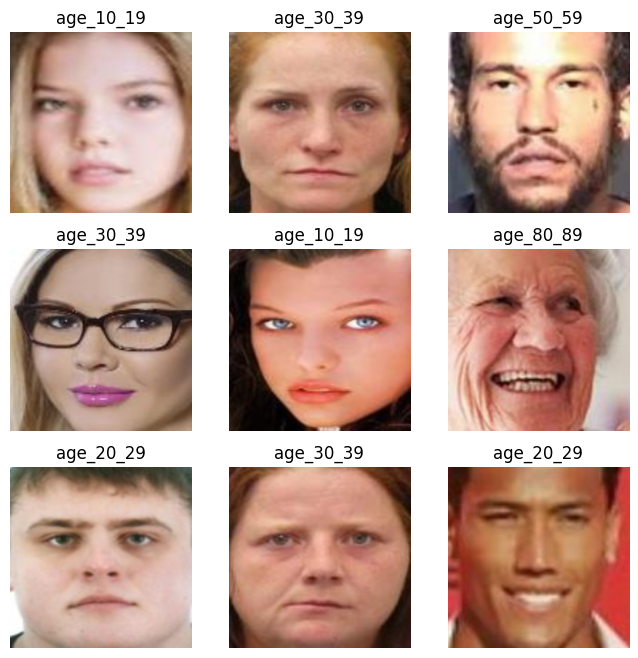

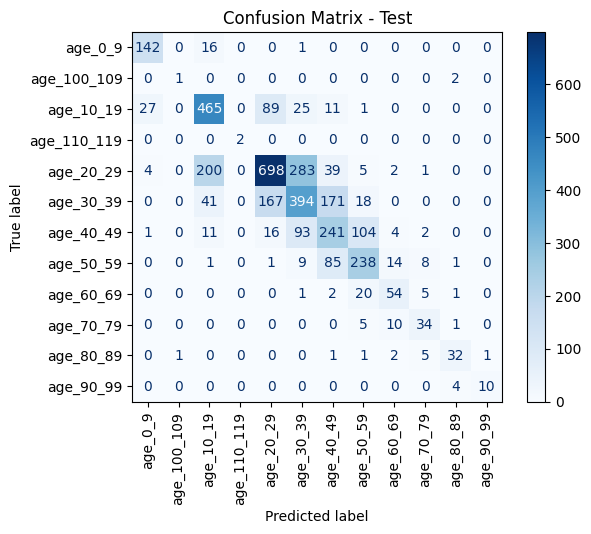


Clasificación detallada (test):
              precision    recall  f1-score   support

     age_0_9       0.82      0.89      0.85       159
 age_100_109       0.50      0.33      0.40         3
   age_10_19       0.63      0.75      0.69       618
 age_110_119       1.00      1.00      1.00         2
   age_20_29       0.72      0.57      0.63      1232
   age_30_39       0.49      0.50      0.49       791
   age_40_49       0.44      0.51      0.47       472
   age_50_59       0.61      0.67      0.64       357
   age_60_69       0.63      0.65      0.64        83
   age_70_79       0.62      0.68      0.65        50
   age_80_89       0.78      0.74      0.76        43
   age_90_99       0.91      0.71      0.80        14

    accuracy                           0.60      3824
   macro avg       0.68      0.67      0.67      3824
weighted avg       0.61      0.60      0.61      3824


🔍 Evaluación en el conjunto de prueba (test):


c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
c:\Users\Javi\anaconda3\envs\TFM\lib\site-packages\fastai\callback\fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


Test Loss: 0.9481, Test Accuracy: 0.6043


IndexError: list index out of range

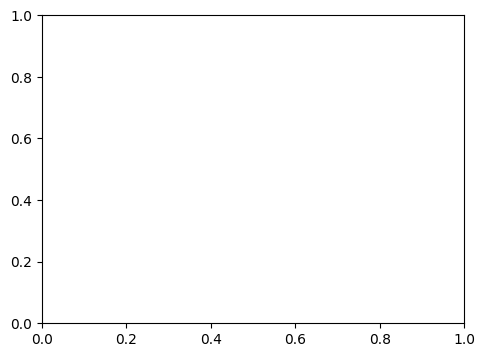

In [9]:
from fastai.vision.all import *
from sklearn.metrics import (mean_absolute_error, confusion_matrix, 
                             classification_report, balanced_accuracy_score, 
                             cohen_kappa_score, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

# ===== PARÁMETROS =====
DATASET_PATH = Path('dataset_rangos_10_split')  # Ruta de tu dataset
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# ===== CONFIGURAR DATALOADERS =====
splitter = GrandparentSplitter(train_name='train', valid_name='valid')

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=splitter,
    get_y=parent_label,
    item_tfms=Resize(IMG_SIZE)
)

dls = dblock.dataloaders(DATASET_PATH, bs=BATCH_SIZE, num_workers=0)

# Mostrar algunas imágenes para verificar la carga
dls.show_batch(max_n=9, figsize=(8, 8))

# ===== CARGAR MODELO GUARDADO =====
learn = vision_learner(
    dls,
    arch=models.efficientnet_b4,
    metrics=[accuracy],
    loss_func=CrossEntropyLossFlat()
).to_fp16()

# Cargar el modelo guardado (ajusta el nombre si es diferente)
learn.load('best_model_v2')

# ===== CREAR DATA LOADER PARA TEST =====
test_files = get_image_files(DATASET_PATH / 'test')
test_dl = dls.test_dl(test_files, with_labels=True)  # Asegúrate de incluir etiquetas

# ===== OBTENER PREDICCIONES =====
preds, targs = learn.get_preds(dl=test_dl)

if targs is not None:  # Si hay etiquetas en el conjunto de test
    pred_labels = preds.argmax(dim=1)

    # ===== MÉTRICAS =====
    # Precisión
    acc = (pred_labels == targs).float().mean()
    print(f"Test Accuracy: {acc:.4f}")

    # MAE (Mean Absolute Error)
    mae = mean_absolute_error(targs, pred_labels)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(targs, pred_labels)
    print(f"Balanced Accuracy: {balanced_acc:.4f}")

    # Cohen's Kappa
    kappa = cohen_kappa_score(targs, pred_labels)
    print(f"Cohen's Kappa: {kappa:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(targs, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title('Confusion Matrix - Test')
    plt.show()

    # Clasificación detallada
    print("\nClasificación detallada (test):")
    print(classification_report(targs, pred_labels, target_names=dls.vocab))
else:  # Si no hay etiquetas, solo generar predicciones
    print("El conjunto de test no tiene etiquetas. Solo se generan predicciones.")
    print(preds)

# ===== EVALUACIÓN FINAL =====
print("\n🔍 Evaluación en el conjunto de prueba (test):")
test_loss, test_accuracy = learn.validate(dl=test_dl)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# ===== GRAFICAR MÉTRICAS =====
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(L(learn.recorder.values).itemgot(2), label='Train Accuracy')
plt.plot(L(learn.recorder.values).itemgot(3), label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(L(learn.recorder.values).itemgot(0), label='Train Loss')
plt.plot(L(learn.recorder.values).itemgot(1), label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [10]:
print(learn.recorder.values)


[[0.9480586647987366, 0.6043410301208496]]


No accuracy metrics available.


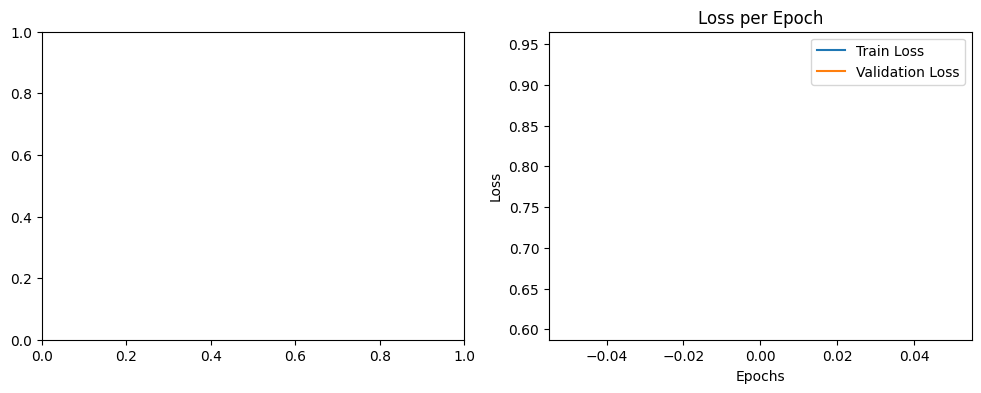

In [12]:
if len(learn.recorder.values) > 0:
    plt.figure(figsize=(12, 4))

    # Precisión
    plt.subplot(1, 2, 1)
    try:
        plt.plot(L(learn.recorder.values).itemgot(2), label='Train Accuracy')
        plt.plot(L(learn.recorder.values).itemgot(3), label='Validation Accuracy')
        plt.title('Accuracy per Epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
    except IndexError:
        print("No accuracy metrics available.")

    # Pérdida
    plt.subplot(1, 2, 2)
    try:
        plt.plot(L(learn.recorder.values).itemgot(0), label='Train Loss')
        plt.plot(L(learn.recorder.values).itemgot(1), label='Validation Loss')
        plt.title('Loss per Epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
    except IndexError:
        print("No loss metrics available.")

    plt.show()
else:
    print("No metrics available for plotting.")
